In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

LABELS = [
    "seizure_vote", 
    "lpd_vote", 
    "gpd_vote", 
    "lrda_vote", 
    "grda_vote", 
    "other_vote"
]

data_dir = "../../kaggle/hms-eeg/data/data/" 

df = pd.read_csv(os.path.join(data_dir, "train.csv"))

labels = df[LABELS].values

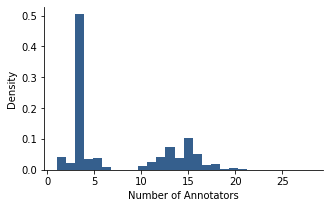

In [2]:
cmap = plt.get_cmap("viridis")
plt.style.use("default")
fig, ax = plt.subplots(figsize = (5, 3))
ax.hist(labels.sum(axis = 1), 28, density = True, color = cmap(0.3))
ax.set_xlabel("Number of Annotators")
ax.set_ylabel("Density")
sns.despine()

plt.savefig("figures/annotator_count.png", dpi = 300, facecolor = "white", bbox_inches = "tight")
plt.show()

110


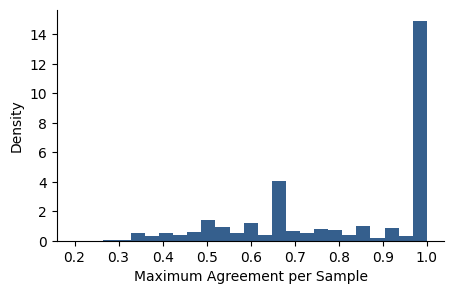

In [3]:
agreement = (labels / labels.sum(axis = 1, keepdims = True)).max(axis = 1)
print(len(np.unique(agreement)))

cmap = plt.get_cmap("viridis")
plt.style.use("default")
fig, ax = plt.subplots(figsize = (5, 3))
ax.hist(agreement, 25, density = True,color = cmap(0.3))
ax.set_xlabel("Maximum Agreement per Sample")
ax.set_ylabel("Density")
sns.despine()

plt.savefig("figures/agreement.png", dpi = 300, facecolor = "white", bbox_inches = "tight")
plt.show()

In [4]:
a, b = np.unique(labels.sum(axis = 1), return_counts = True)
print(a)
print(b)

[ 1  2  3  4  5  6  7 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28]
[ 4360  2316 51867  3451  3974   883     3  1146  2602  4356  7525  3887
 10665  5191  1445  1934   250   634   179    54    24    17    20     6
     5     6]


In [5]:
LABELS_STR = [
    "Seizure",
    "LPD",
    "GPD",
    "LRDA",
    "GRDA",
    "Other"
]

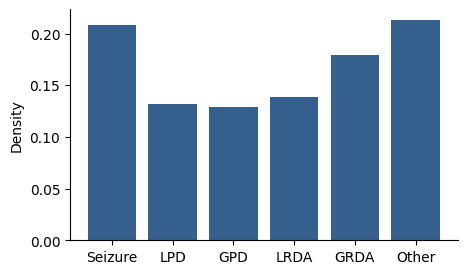

In [6]:
norm_labels = (labels / labels.sum(axis = 1, keepdims = True))
classes = norm_labels.mean(axis = 0)
classes = classes / classes.sum()

cmap = plt.get_cmap("viridis")
plt.style.use("default")
fig, ax = plt.subplots(figsize = (5, 3))
ax.bar(LABELS_STR, classes, color = cmap(0.3))

ax.set_ylabel("Density")
sns.despine()

plt.savefig("figures/class_balance_no_eeg_id.png", dpi = 300, facecolor = "white", bbox_inches = "tight")
plt.show()

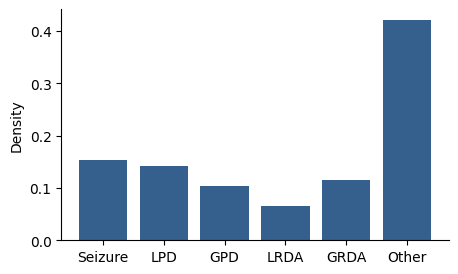

In [7]:
eeg_labels = df.groupby("eeg_id")[LABELS].mean().to_numpy()
norm_labels = eeg_labels / eeg_labels.sum(axis = 1, keepdims = True)
classes = norm_labels.mean(axis = 0)
classes = classes / classes.sum()

cmap = plt.get_cmap("viridis")
plt.style.use("default")
fig, ax = plt.subplots(figsize = (5, 3))
ax.bar(LABELS_STR, classes, color = cmap(0.3))

ax.set_ylabel("Density")
sns.despine()

plt.savefig("figures/class_imbalance.png", dpi = 300, facecolor = "white", bbox_inches = "tight")
plt.show()

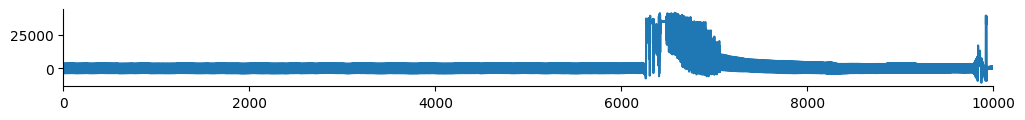

In [8]:
import polars as pl

eeg_id = 3649445563
path = os.path.join(data_dir, f"train_eegs/{eeg_id}.parquet")
    
df_eeg = pl.read_parquet(path)
fp1 = df_eeg["Fp1"].to_numpy()
f7 = df_eeg["F7"].to_numpy()

plt.figure(figsize = (12, 1))
plt.plot(fp1 - f7)
plt.xlim([0, 10_000])
sns.despine()
plt.savefig(f"./figures/artifact_{eeg_id}.png", dpi = 400, facecolor = "white", bbox_inches = "tight")
plt.show()